In [9]:
!pip install cloudmesh-common

In [10]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cloudmesh.common.StopWatch import StopWatch

In [11]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
StopWatch.start("Loading Data")

dataset = pd.read_csv('https://raw.githubusercontent.com/cybertraining-dsc/sp21-599-353/main/project/code/AMZN_Stock_Price.csv')

training_ratio = 0.8
training_num = int(len(dataset)*training_ratio)
training_data = dataset[:training_num]
testing_data = dataset[training_num:]

training_set_open = training_data.iloc[:,1:2].values
training_set_vol = training_data.iloc[:,6:7].values # Getting Volume
#training_set = np.column_stack(training_set_open, training_set_vol)
training_set = training_set_open

testing_set_open = testing_data.iloc[:,1:2].values
testing_set_vol = testing_data.iloc[:,6:7].values # Getting Volume
#testing_set = np.column_stack(testing_set_open, testing_set_vol)
testing_set = testing_set_open

print(training_set.shape, testing_set.shape)

StopWatch.stop("Loading Data")

(4826, 1) (1207, 1)


In [13]:
sc = MinMaxScaler(feature_range = (0, 2))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
x_train = []
y_train = []
for i in range(60,len(training_set)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
StopWatch.start("training")

model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)
model.save('my_model')

StopWatch.stop("training")

Epoch 1/100
149/149 [==============================] - 38s 14ms/step - loss: 0.0224
Epoch 2/100
149/149 [==============================] - 2s 13ms/step - loss: 0.0041
Epoch 3/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0030
Epoch 4/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 5/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0025
Epoch 6/100
149/149 [==============================] - 2s 13ms/step - loss: 0.0027
Epoch 7/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0030
Epoch 8/100
149/149 [==============================] - 2s 13ms/step - loss: 0.0029
Epoch 9/100
149/149 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 10/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0022
Epoch 11/100
149/149 [==============================] - 2s 13ms/step - loss: 0.0017
Epoch 12/100
149/149 [==============================] - 2s 14ms/step - loss: 0.0018


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [16]:
model = load_model('my_model')

In [17]:
StopWatch.start("Prediction")

all_data = dataset["Open"]
inputs = all_data[len(all_data) - len(testing_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, len(testing_data)):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

StopWatch.stop("Prediction")

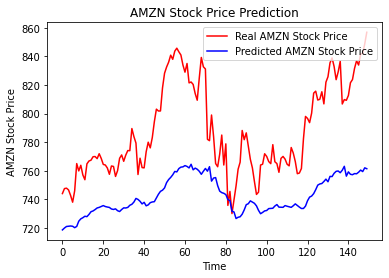

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(testing_set[:150], color = 'red', label = 'Real AMZN Stock Price')
plt.plot(predicted_stock_price[:150], color = 'blue', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()
plt.savefig("AMZN_stock_prediction_graph.png")

In [20]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           